In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
import plotly.express as px

## Data Wrangling

In [292]:
df_2010 = pd.read_excel('online_retail_II.xlsx', engine= 'openpyxl')
df_2011 = pd.read_excel('Online_Retail.xlsx', engine= 'openpyxl')

In [293]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [294]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [295]:
df_2010.rename(columns={'Invoice' : 'InvoiceNo', 'Price' : 'UnitPrice', 'Customer ID' : 'CustomerID'}, inplace= True)
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   UnitPrice    525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [296]:
df_combined = pd.concat([df_2010, df_2011], ignore_index=True)
df_combined = df_combined.sort_values(by='InvoiceDate').reset_index(drop=True)
df_combined

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
1067366,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
1067367,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [297]:
df_combined.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

In [298]:
df_combined.isnull().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

In [299]:
df_combined = df_combined.dropna()
df_combined.describe()

,Quantity,UnitPrice,CustomerID
count,824363.000000,824363.000000,824363.000000
mean,12.414588,3.676782,15324.641712
std,188.976213,70.241429,1697.462981
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [300]:
df_combined = df_combined[df_combined['Quantity'] > 0]
df_combined.describe()

,Quantity,UnitPrice,CustomerID
count,805619.000000,805619.000000,805619.000000
mean,13.307680,3.206261,15331.859542
std,144.306828,29.197915,1696.766876
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


In [301]:
df_combined = df_combined[df_combined['UnitPrice'] > 0]
df_combined.describe()

,Quantity,UnitPrice,CustomerID
count,805548.000000,805548.000000,805548.000000
mean,13.290538,3.206543,15331.958262
std,143.634177,29.199186,1696.735519
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


In [302]:
df_combined = df_combined.drop_duplicates(ignore_index=True)
df_combined

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
779419,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
779420,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
779421,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
779422,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


In [303]:
df_combined['InvoiceNo'] = df_combined['InvoiceNo'].astype(str)

# Filter out rows where 'Invoice' starts with 'C' or 'c'
df_combined = df_combined[~df_combined['InvoiceNo'].str.match(r'^[Cc]')]

In [304]:
df_combined["IsCancelled"] = np.where(df_combined['InvoiceNo'].astype(str).apply(lambda l: l[0]=="C"), True, False)
df_combined['IsCancelled'].value_counts() / df_combined.shape[0] * 100

False    100.0
Name: IsCancelled, dtype: float64

In [305]:
df_combined[df_combined['Description'].str.contains('test')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
20719,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom,False
20962,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom,False
20963,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom,False
27601,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom,False
27612,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom,False
30272,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom,False
30273,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom,False
36707,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom,False
43478,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom,False
113267,504188,TEST001,This is a test product.,5,2010-04-12 09:52:00,4.5,16454.0,United Kingdom,False


In [306]:
df_combined = df_combined[~df_combined['Description'].str.contains('test')]

In [307]:
df_combined[df_combined['Description'].str.contains('test')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled


In [308]:
df_combined['Month'] = df_combined['InvoiceDate'].dt.month
df_combined['Year'] = df_combined['InvoiceDate'].dt.year
df_combined

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
779419,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011
779420,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011
779421,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011
779422,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,False,12,2011


In [309]:
df_combined['Revenue'] = df_combined['UnitPrice'] * df_combined['Quantity']
df_combined

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,Month,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False,12,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,12,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,12,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False,12,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False,12,2009,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...
779419,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011,19.80
779420,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011,19.80
779421,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,16.60
779422,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,False,12,2011,15.00


In [310]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779414 entries, 0 to 779423
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779414 non-null  object        
 1   StockCode    779414 non-null  object        
 2   Description  779414 non-null  object        
 3   Quantity     779414 non-null  int64         
 4   InvoiceDate  779414 non-null  datetime64[ns]
 5   UnitPrice    779414 non-null  float64       
 6   CustomerID   779414 non-null  float64       
 7   Country      779414 non-null  object        
 8   IsCancelled  779414 non-null  bool          
 9   Month        779414 non-null  int64         
 10  Year         779414 non-null  int64         
 11  Revenue      779414 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 72.1+ MB


In [311]:
df_combined.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Revenue
count,779414.000000,779414.000000,779414.000000,779414.000000,779414.000000,779414.000000
mean,13.489493,3.218457,15320.396739,7.417061,2010.432062,22.291825
std,145.856839,29.676344,1695.671495,3.422287,0.568376,227.428678
min,1.000000,0.001000,12346.000000,1.000000,2009.000000,0.001000
25%,2.000000,1.250000,13971.000000,5.000000,2010.000000,4.950000
50%,6.000000,1.950000,15247.000000,8.000000,2010.000000,12.480000
75%,12.000000,3.750000,16794.000000,11.000000,2011.000000,19.800000
max,80995.000000,10953.500000,18287.000000,12.000000,2011.000000,168469.600000


In [312]:
df_combined = df_combined[df_combined['InvoiceDate'].dt.year > 2009]

In [313]:
correlation_matrix = df_combined.corr()
correlation_with_revenue = correlation_matrix['Revenue'].drop('Revenue')  

print("Correlation of each column with Revenue:")
print(correlation_with_revenue)

Correlation of each column with Revenue:
Quantity       0.828895
UnitPrice      0.135944
CustomerID    -0.005262
IsCancelled         NaN
Month         -0.003117
Year           0.001608
Name: Revenue, dtype: float64


In [314]:
df_combined['TotalPrice'] = df_combined['Quantity'] * df_combined['UnitPrice']

/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [315]:
# Calculate the IQR for Quantity, UnitPrice, and Revenue
Q1_quantity = df_combined['Quantity'].quantile(0.25)
Q3_quantity = df_combined['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unit_price = df_combined['UnitPrice'].quantile(0.25)
Q3_unit_price = df_combined['UnitPrice'].quantile(0.75)
IQR_unit_price = Q3_unit_price - Q1_unit_price

Q1_revenue = df_combined['Revenue'].quantile(0.25)
Q3_revenue = df_combined['Revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

# Calculate the lower and upper bounds for each column to identify outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unit_price = Q1_unit_price - 1.5 * IQR_unit_price
upper_bound_unit_price = Q3_unit_price + 1.5 * IQR_unit_price

lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Find the rows with outliers
outliers_quantity = df_combined[(df_combined['Quantity'] < lower_bound_quantity) | (df_combined['Quantity'] > upper_bound_quantity)]
outliers_unit_price = df_combined[(df_combined['UnitPrice'] < lower_bound_unit_price) | (df_combined['UnitPrice'] > upper_bound_unit_price)]
outliers_revenue = df_combined[(df_combined['Revenue'] < lower_bound_revenue) | (df_combined['Revenue'] > upper_bound_revenue)]

print("Outliers in Quantity:", outliers_quantity)
print("Outliers in UnitPrice:", outliers_unit_price)
print("Outliers in Revenue:", outliers_revenue)


Outliers in Quantity:        InvoiceNo StockCode                         Description  Quantity  \
30278     493414     21844                      RETRO SPOT MUG        36   
30348     493432    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
30380     493433     21929      JUMBO BAG PINK VINTAGE PAISLEY        30   
30385     493434    84596B  SMALL DOLLY MIX DESIGN ORANGE BOWL        72   
30386     493434    84596F        SMALL MARSHMALLOWS PINK BOWL        72   
...          ...       ...                                 ...       ...   
779345    581579     23199                    JUMBO BAG APPLES        30   
779380    581583     20725             LUNCH BAG RED RETROSPOT        40   
779381    581583     85038     6 CHOCOLATE LOVE HEART T-LIGHTS        36   
779382    581584     85038     6 CHOCOLATE LOVE HEART T-LIGHTS        48   
779383    581584     20832    RED FLOCK LOVE HEART PHOTO FRAME        72   

               InvoiceDate  UnitPrice  CustomerID         Country

In [316]:
# Filter the data to exclude outliers
df_combined_no_outliers = df_combined[
    (df_combined['Quantity'] >= lower_bound_quantity) & (df_combined['Quantity'] <= upper_bound_quantity) &
    (df_combined['UnitPrice'] >= lower_bound_unit_price) & (df_combined['UnitPrice'] <= upper_bound_unit_price) &
    (df_combined['Revenue'] >= lower_bound_revenue) & (df_combined['Revenue'] <= upper_bound_revenue)
]

print(f"Original dataset size: {df_combined.shape}")
print(f"Cleaned dataset size: {df_combined_no_outliers.shape}")


Original dataset size: (749147, 13)
Cleaned dataset size: (618631, 13)


In [317]:
df_combined_no_outliers.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Revenue,TotalPrice
count,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000
mean,7.134607,2.199752,15352.088271,7.256982,2010.489544,11.342518,11.342518
std,6.524394,1.561832,1693.355104,3.364696,0.499891,8.724372,8.724372
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.001000,0.001000
25%,2.000000,1.250000,13999.000000,4.000000,2010.000000,3.900000,3.900000
50%,5.000000,1.650000,15311.000000,8.000000,2010.000000,10.080000,10.080000
75%,12.000000,2.950000,16817.000000,10.000000,2011.000000,16.500000,16.500000
max,27.000000,7.500000,18287.000000,12.000000,2011.000000,42.000000,42.000000


In [318]:
len(pd.unique(df_combined_no_outliers['CustomerID']))

5534

In [319]:
# Group by 'Year' and 'Month', then calculate the sum of 'Quantity', 'Revenue', and other columns of interest
monthly_data = df_combined_no_outliers.groupby(['Year', 'Month']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',  
    'Revenue': 'sum',     
    'CustomerID': 'nunique'  
}).reset_index()

correlation_matrix = monthly_data.corr()
correlation_with_revenue = correlation_matrix['Revenue'].drop('Revenue')  

print("Correlation of each column with Revenue (monthly data):")
print(correlation_with_revenue)


Correlation of each column with Revenue (monthly data):
Year         -0.062570
Month         0.548665
Quantity      0.994814
UnitPrice    -0.088767
CustomerID    0.985401
Name: Revenue, dtype: float64


## Sales Performance Analysis

In [320]:
rev_frequency = df_combined_no_outliers.groupby(['Year', 'Month']).agg({'Revenue' : 'sum'}).reset_index()
rev_frequency

,Year,Month,Revenue
0,2010,1,207083.202
1,2010,2,219668.486
2,2010,3,301035.831
3,2010,4,262412.662
4,2010,5,263597.190
5,2010,6,279422.860
6,2010,7,256183.580
7,2010,8,252864.470
8,2010,9,348075.831
9,2010,10,456290.230


In [321]:
rev_frequency.describe()

,Year,Month,Revenue
count,24.000000,24.000000,24.000000
mean,2010.500000,6.500000,292368.053250
std,0.510754,3.526299,104708.233581
min,2010.000000,1.000000,145811.510000
25%,2010.000000,3.750000,228744.771500
50%,2010.500000,6.500000,259298.121000
75%,2011.000000,9.250000,312795.831000
max,2011.000000,12.000000,540284.570000


In [322]:
desc_stats = rev_frequency.describe()
correlation = desc_stats.loc['mean'].corr(desc_stats.loc['std'])
print(f"Correlation between Mean and Std: {correlation}")


Correlation between Mean and Std: 0.9999821110016256


In [323]:
skewness_x = rev_frequency['Revenue'].skew()
print(f"Skewness for X: {skewness_x}")

Skewness for X: 1.1546360448711535


<AxesSubplot:xlabel='Month', ylabel='Revenue'>

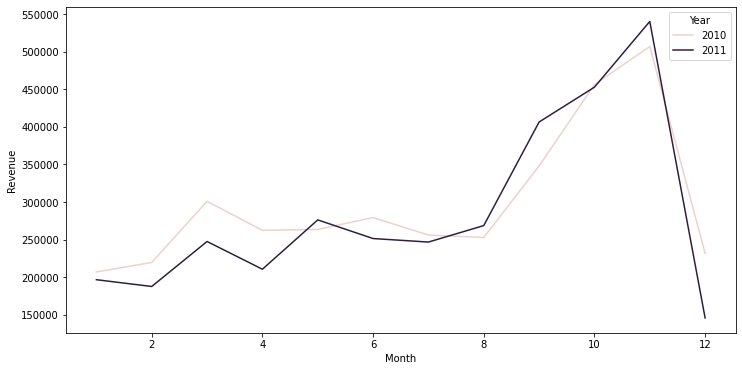

In [324]:
plt.subplots(figsize= (12, 6))
sns.lineplot(x= rev_frequency['Month'], y= rev_frequency['Revenue'], hue= rev_frequency['Year'])

In [325]:
avg_rev_2010 = rev_frequency[rev_frequency['Year'] == 2010]['Revenue'].median()
avg_rev_2010

263004.92600000976

In [326]:
avg_rev_2011 = rev_frequency[rev_frequency['Year'] == 2011]['Revenue'].median()
avg_rev_2011

249534.7050000009

In [327]:
rev_frequency['MonthPerformance'] = rev_frequency.apply(
    lambda row: 'AboveMED' if (row['Year'] == 2010 and row['Revenue'] > avg_rev_2010) or 
                (row['Year'] == 2011 and row['Revenue'] > avg_rev_2011) 
                else 'UnderMED', axis=1)

rev_frequency

,Year,Month,Revenue,MonthPerformance
0,2010,1,207083.202,UnderMED
1,2010,2,219668.486,UnderMED
2,2010,3,301035.831,AboveMED
3,2010,4,262412.662,UnderMED
4,2010,5,263597.190,AboveMED
5,2010,6,279422.860,AboveMED
6,2010,7,256183.580,UnderMED
7,2010,8,252864.470,UnderMED
8,2010,9,348075.831,AboveMED
9,2010,10,456290.230,AboveMED


In [328]:
sorted_rev_frequency = rev_frequency.sort_values('Revenue', ascending= False)
sorted_rev_frequency

,Year,Month,Revenue,MonthPerformance
22,2011,11,540284.570,AboveMED
10,2010,11,506976.102,AboveMED
9,2010,10,456290.230,AboveMED
21,2011,10,452846.520,AboveMED
20,2011,9,406511.302,AboveMED
8,2010,9,348075.831,AboveMED
2,2010,3,301035.831,AboveMED
5,2010,6,279422.860,AboveMED
16,2011,5,276289.090,AboveMED
19,2011,8,268723.410,AboveMED


In [329]:
peak_months = sorted_rev_frequency.head(3)
peak_months

,Year,Month,Revenue,MonthPerformance
22,2011,11,540284.570,AboveMED
10,2010,11,506976.102,AboveMED
9,2010,10,456290.230,AboveMED


In [330]:
dip_months = sorted_rev_frequency.tail(3)
dip_months

,Year,Month,Revenue,MonthPerformance
12,2011,1,196714.92,UnderMED
13,2011,2,187711.72,UnderMED
23,2011,12,145811.51,UnderMED


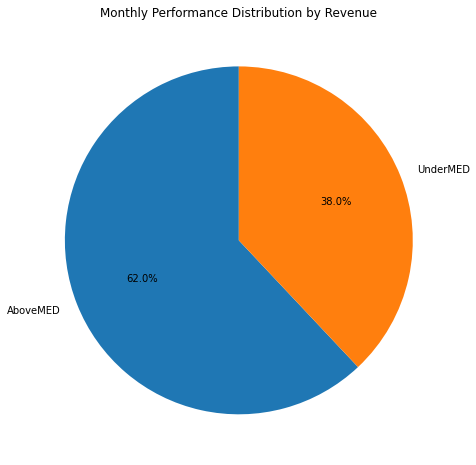

In [331]:
performance_summary = rev_frequency.groupby('MonthPerformance')['Revenue'].sum()
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')  
ax.set_facecolor('white')  

ax.pie(
    x=performance_summary, 
    labels=performance_summary.index, 
    startangle=90,
    autopct='%1.1f%%',  
)
ax.set_title('Monthly Performance Distribution by Revenue')
plt.show()

In [332]:
customer_id_frequency = df_combined_no_outliers.groupby(['Year', 'Month']).agg({'CustomerID' : 'nunique'}).reset_index()
customer_id_frequency

,Year,Month,CustomerID
0,2010,1,647
1,2010,2,725
2,2010,3,976
3,2010,4,867
4,2010,5,900
5,2010,6,960
6,2010,7,852
7,2010,8,842
8,2010,9,1047
9,2010,10,1395


<AxesSubplot:xlabel='Month', ylabel='CustomerID'>

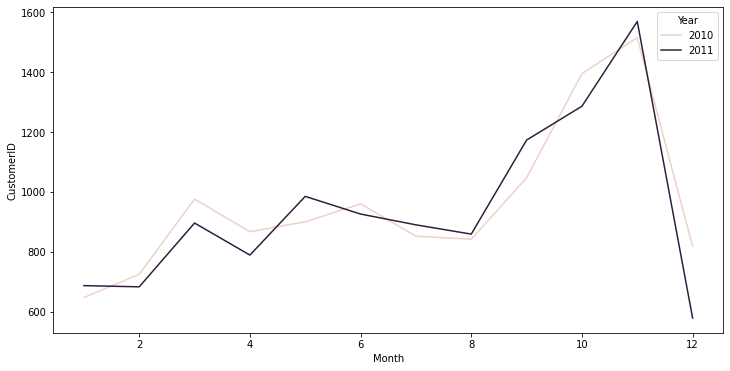

In [333]:
plt.subplots(figsize= (12, 6))
sns.lineplot(x= customer_id_frequency['Month'], y= customer_id_frequency['CustomerID'], hue= customer_id_frequency['Year'])

In [334]:
avg_cus_id_2010 = customer_id_frequency[customer_id_frequency['Year'] == 2010]['CustomerID'].median()
avg_cus_id_2010

883.5

In [335]:
avg_cus_id_2011 = customer_id_frequency[customer_id_frequency['Year'] == 2011]['CustomerID'].median()
avg_cus_id_2011

893.0

In [336]:
customer_id_frequency['MonthPerformance'] = customer_id_frequency.apply(
    lambda row: 'AboveMED' if (row['Year'] == 2010 and row['CustomerID'] > avg_cus_id_2010) or 
                (row['Year'] == 2011 and row['CustomerID'] > avg_cus_id_2011) 
                else 'UnderMED', axis=1)

customer_id_frequency

,Year,Month,CustomerID,MonthPerformance
0,2010,1,647,UnderMED
1,2010,2,725,UnderMED
2,2010,3,976,AboveMED
3,2010,4,867,UnderMED
4,2010,5,900,AboveMED
5,2010,6,960,AboveMED
6,2010,7,852,UnderMED
7,2010,8,842,UnderMED
8,2010,9,1047,AboveMED
9,2010,10,1395,AboveMED


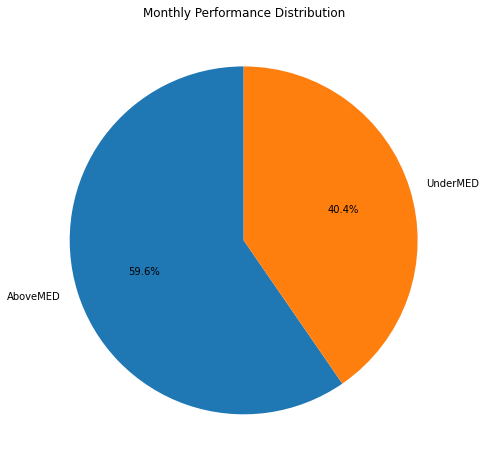

In [337]:
performance_summary = customer_id_frequency.groupby('MonthPerformance')['CustomerID'].sum()

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')  
ax.set_facecolor('white')  

ax.pie(
    x=performance_summary, 
    labels=performance_summary.index, 
    startangle=90,
    autopct='%1.1f%%', 
)
ax.set_title('Monthly Performance Distribution')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='CustomerID'>

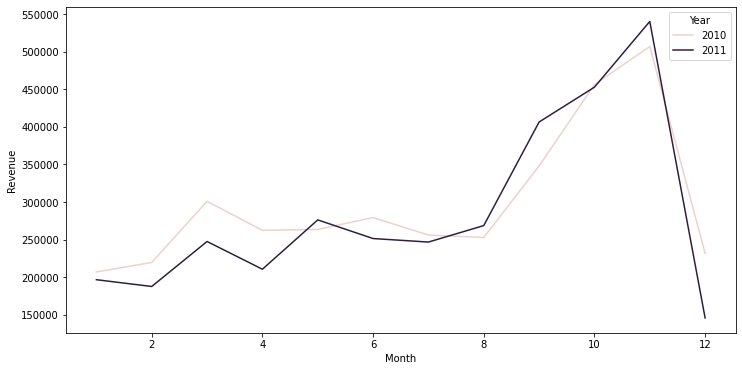

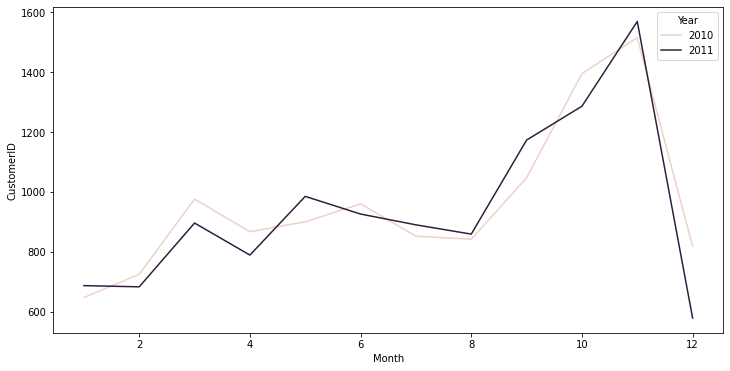

In [338]:
plt.subplots(figsize= (12, 6))
sns.lineplot(x= rev_frequency['Month'], y= rev_frequency['Revenue'], hue= rev_frequency['Year'])

plt.subplots(figsize= (12, 6))
sns.lineplot(x= customer_id_frequency['Month'], y= customer_id_frequency['CustomerID'], hue= customer_id_frequency['Year'])

## Customer Segmentation

In [339]:
customer_id_frequency = df_combined_no_outliers.groupby(['Year', 'Month', 'CustomerID']).agg({'InvoiceNo' : 'nunique', 'Revenue' : 'sum'}).reset_index()

In [340]:
customer_id_frequency.describe()

,Year,Month,CustomerID,InvoiceNo,Revenue
count,22866.000000,22866.000000,22866.000000,22866.000000,22866.000000
mean,2010.495146,7.015263,15295.548456,1.354107,306.867545
std,0.499987,3.349198,1702.895230,1.141580,393.694343
min,2010.000000,1.000000,12346.000000,1.000000,0.001000
25%,2010.000000,4.000000,13842.250000,1.000000,122.692500
50%,2010.000000,7.000000,15263.500000,1.000000,225.410000
75%,2011.000000,10.000000,16771.000000,1.000000,375.380000
max,2011.000000,12.000000,18287.000000,41.000000,12792.380000


In [341]:
monthly_avg = customer_id_frequency.groupby(['Year', 'Month'])['InvoiceNo'].mean().reset_index()
monthly_avg = monthly_avg.rename(columns={'InvoiceNo': 'Avg_Transactions'})

customer_id_frequency = customer_id_frequency.merge(monthly_avg, on=['Year', 'Month'], how='left')

def classify_customer(row):
    if row['InvoiceNo'] < row['Avg_Transactions']:
        return 'Underperforming'
    elif row['InvoiceNo'] >= row['Avg_Transactions']:
        return 'Above Average'


customer_id_frequency['Performance'] = customer_id_frequency.apply(classify_customer, axis=1)

print(customer_id_frequency['Performance'].unique())
print(customer_id_frequency)

['Underperforming' 'Above Average']
       Year  Month  CustomerID  InvoiceNo  Revenue  Avg_Transactions  \
0      2010      1     12361.0          1    94.20          1.299845   
1      2010      1     12406.0          1   376.88          1.299845   
2      2010      1     12417.0          1   258.80          1.299845   
3      2010      1     12431.0          1   873.92          1.299845   
4      2010      1     12437.0          1   396.48          1.299845   
...     ...    ...         ...        ...      ...               ...   
22861  2011     12     18237.0          1   125.75          1.203800   
22862  2011     12     18245.0          1   785.35          1.203800   
22863  2011     12     18272.0          1   367.88          1.203800   
22864  2011     12     18282.0          1    52.34          1.203800   
22865  2011     12     18283.0          1   208.00          1.203800   

           Performance  
0      Underperforming  
1      Underperforming  
2      Underperforming  

In [342]:
customer_id_frequency.rename(columns={"InvoiceNo" : "Transaction"}, inplace= True)

In [343]:
customer_id_frequency.describe()

,Year,Month,CustomerID,Transaction,Revenue,Avg_Transactions
count,22866.000000,22866.000000,22866.000000,22866.000000,22866.000000,22866.000000
mean,2010.495146,7.015263,15295.548456,1.354107,306.867545,1.354107
std,0.499987,3.349198,1702.895230,1.141580,393.694343,0.077208
min,2010.000000,1.000000,12346.000000,1.000000,0.001000,1.203800
25%,2010.000000,4.000000,13842.250000,1.000000,122.692500,1.300349
50%,2010.000000,7.000000,15263.500000,1.000000,225.410000,1.334917
75%,2011.000000,10.000000,16771.000000,1.000000,375.380000,1.373448
max,2011.000000,12.000000,18287.000000,41.000000,12792.380000,1.511154


In [344]:
pd.unique(customer_id_frequency['Performance'])

array(['Underperforming', 'Above Average'], dtype=object)

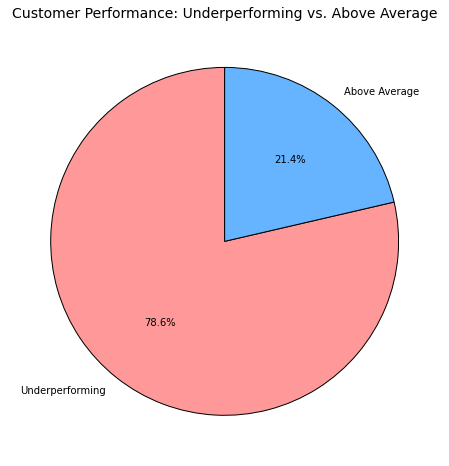

In [345]:
performance_counts = customer_id_frequency['Performance'].value_counts()

plt.figure(figsize=(8, 8))  
plt.pie(
    performance_counts, 
    labels=performance_counts.index, 
    startangle=90, 
    autopct='%1.1f%%',  
    colors=['#ff9999','#66b3ff'], 
    wedgeprops={'edgecolor': 'black'}  
)


plt.title('Customer Performance: Underperforming vs. Above Average', fontsize=14)
plt.gcf().set_facecolor('white')
plt.show()

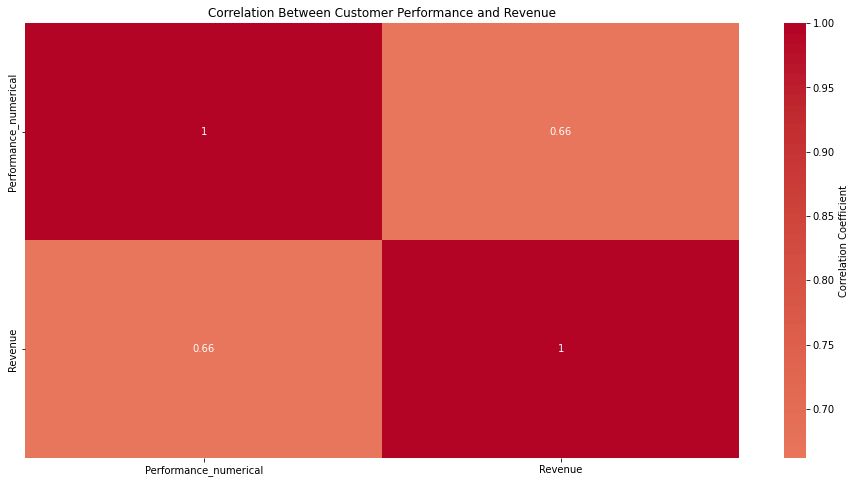

Correlation between Customer Performance and Revenue: 0.6619456364076045


In [346]:
customer_id_frequency['Performance_numerical'] = customer_id_frequency['Performance'].map({'Above Average': 1, 'Underperforming': 0})

correlation_data = customer_id_frequency.groupby(['Year', 'Month']).agg({
    'Performance_numerical': 'mean',  
    'Revenue': 'sum'
}).reset_index()
correlation = correlation_data[['Performance_numerical', 'Revenue']].corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Between Customer Performance and Revenue")
plt.show()

print(f"Correlation between Customer Performance and Revenue: {correlation.loc['Performance_numerical', 'Revenue']}")

In [347]:
snapshot_date = df_combined_no_outliers['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_combined_no_outliers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Optionally, you can scale the RFM values if needed for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Remove outliers using Z-Score method
z_scores = zscore(rfm_scaled)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keep rows where all columns have Z-score < 3
rfm_filtered = rfm[filtered_entries]

# Apply KMeans clustering on the scaled filtered RFM data
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model and assign clusters to the filtered data
rfm_filtered['Cluster'] = kmeans.fit_predict(scaler.transform(rfm_filtered))


# Show the RFM data after Z-score outlier removal
print("RFM data after Z-score outlier removal:")
print(rfm_filtered.head())

RFM data after Z-score outlier removal:
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         529          2    169.36        1
12347.0           2          8   3474.85        2
12348.0         249          4    312.36        0
12349.0          19          3   2309.64        0
12350.0         310          1    294.40        1


/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



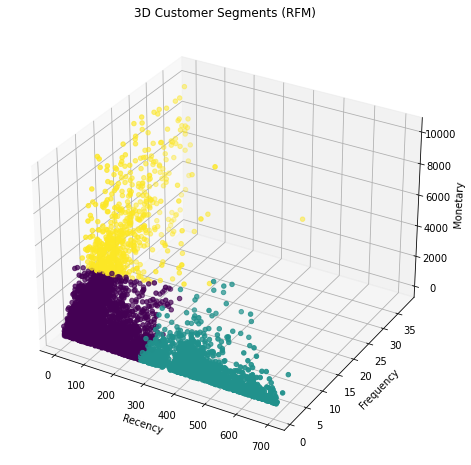

In [348]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = rfm_filtered['Recency']
y = rfm_filtered['Frequency']
z = rfm_filtered['Monetary']

ax.scatter(x, y, z, c=rfm_filtered['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segments (RFM)')

plt.show()

In [349]:
fig = px.scatter_3d(rfm_filtered, x='Recency', y='Frequency', z='Monetary', color='Cluster', 
                    title='3D Customer Segments (RFM)', labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary'})

fig.update_layout(
    width=1200,   
    height=800    
)

fig.show()

In [350]:
rfm_summary = rfm_filtered.groupby('Cluster').mean()  
rfm_summary

,Recency,Frequency,Monetary
Cluster,,,
0,77.784417,3.984153,804.671700
1,452.431856,2.008974,390.984202
2,33.317337,16.455108,4228.060146


In [351]:
def label_segment(row):
    if row['Cluster'] == 2: 
        return 'High Value'
    elif row['Cluster'] == 0:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm_filtered['Segment'] = rfm_filtered.apply(label_segment, axis=1)

/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
rfm_filtered.reset_index(inplace=  True)
rfm_filtered

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,529,2,169.36,1,Low Value
1,12347.0,2,8,3474.85,2,High Value
2,12348.0,249,4,312.36,0,Medium Value
3,12349.0,19,3,2309.64,0,Medium Value
4,12350.0,310,1,294.40,1,Low Value
...,...,...,...,...,...,...
5453,18283.0,4,22,2511.25,2,High Value
5454,18284.0,432,1,286.88,1,Low Value
5455,18285.0,661,1,93.20,1,Low Value
5456,18286.0,477,1,734.97,1,Low Value


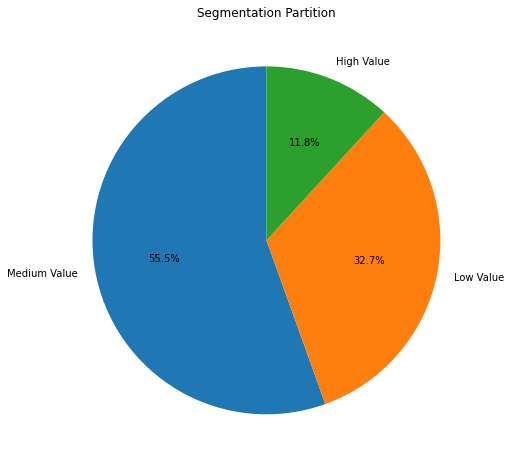

In [353]:
segment_counts = rfm_filtered['Segment'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white') 
ax.set_facecolor('white')  

ax.pie(
    x=segment_counts, 
    labels=segment_counts.index, 
    startangle=90,
    autopct='%1.1f%%',  
)
ax.set_title('Segmentation Partition')
plt.show()

In [354]:
high_customer_rev = rfm_filtered[rfm_filtered['Segment'] == 'High Value']['Monetary'].sum()
high_customer_rev

2731326.8539999994

In [355]:
high_customer_avg_rev = rfm_filtered[rfm_filtered['Segment'] == 'High Value']['Monetary'].mean()
high_customer_avg_rev

4228.060145510835

In [356]:
med_customer_rev = rfm_filtered[rfm_filtered['Segment'] == 'Medium Value']['Monetary'].sum()
med_customer_rev

2437350.5790000004

In [357]:
med_customer_avg_rev = rfm_filtered[rfm_filtered['Segment'] == 'Medium Value']['Monetary'].mean()
med_customer_avg_rev

804.6716999009575

In [358]:
low_customer_rev = rfm_filtered[rfm_filtered['Segment'] == 'Low Value']['Monetary'].sum()
low_customer_rev

697124.8330000001

In [359]:
low_customer_avg_rev = rfm_filtered[rfm_filtered['Segment'] == 'Low Value']['Monetary'].mean()
low_customer_avg_rev

390.98420246775106

In [360]:
df_combined_no_outliers['YearMonth'] = df_combined_no_outliers['Year'].astype(str) + '-' + df_combined_no_outliers['Month'].astype(str).str.zfill(2)

/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [361]:
df_combined_with_segments = pd.merge(df_combined_no_outliers, rfm_filtered[['CustomerID', 'Segment']], on='CustomerID', how='left')
df_combined_with_segments

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,Month,Year,Revenue,TotalPrice,YearMonth,Segment
0,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590.0,United Kingdom,False,1,2010,8.50,8.50,2010-01,Low Value
1,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,False,1,2010,5.10,5.10,2010-01,Low Value
2,493427,72369A,PINK CLEAR GLASS CANDLE PLATE,6,2010-01-04 10:43:00,1.25,13287.0,United Kingdom,False,1,2010,7.50,7.50,2010-01,Low Value
3,493427,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-01-04 10:43:00,4.25,13287.0,United Kingdom,False,1,2010,17.00,17.00,2010-01,Low Value
4,493427,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2010-01-04 10:43:00,1.25,13287.0,United Kingdom,False,1,2010,15.00,15.00,2010-01,Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618626,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011,19.80,19.80,2011-12,Medium Value
618627,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,False,12,2011,19.80,19.80,2011-12,Medium Value
618628,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,16.60,16.60,2011-12,Medium Value
618629,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,False,12,2011,15.00,15.00,2011-12,Medium Value


In [362]:
df_combined_with_segments.describe()

,Quantity,UnitPrice,CustomerID,Month,Year,Revenue,TotalPrice
count,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000,618631.000000
mean,7.134607,2.199752,15352.088271,7.256982,2010.489544,11.342518,11.342518
std,6.524394,1.561832,1693.355104,3.364696,0.499891,8.724372,8.724372
min,1.000000,0.001000,12346.000000,1.000000,2010.000000,0.001000,0.001000
25%,2.000000,1.250000,13999.000000,4.000000,2010.000000,3.900000,3.900000
50%,5.000000,1.650000,15311.000000,8.000000,2010.000000,10.080000,10.080000
75%,12.000000,2.950000,16817.000000,10.000000,2011.000000,16.500000,16.500000
max,27.000000,7.500000,18287.000000,12.000000,2011.000000,42.000000,42.000000


In [363]:
df_combined_with_segments.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
IsCancelled         0
Month               0
Year                0
Revenue             0
TotalPrice          0
YearMonth           0
Segment        100424
dtype: int64

In [364]:
df_combined_with_segments[df_combined_with_segments['Segment'].isna()]['CustomerID'].unique() # These Customer IDs is out of Z score segmentation

array([14680., 14527., 13004., 17841., 14606., 16779., 15311., 17675.,
       13408., 14194., 13081., 16746., 13767., 13468., 14911., 14769.,
       14735., 17243., 12681., 13078., 15640., 15856., 12540., 14849.,
       17920., 13089., 13319., 12471., 15738., 13093., 17961., 15358.,
       12682., 17757., 17850., 14667., 17377., 13178., 15039., 17581.,
       15005., 17706., 17511., 12748., 14156., 13564., 16422., 12949.,
       13001., 14646., 12921., 17865., 15615., 14298., 16168., 12472.,
       16161., 12621., 12971., 18172., 15078., 15498., 14895., 17448.,
       17589., 17338., 17389., 17068., 16549., 16133., 12841., 17735.,
       17811., 17315., 15159., 14096.])

In [365]:
df_combined_with_segments.dropna(subset= ['Segment'], inplace= True) # Drop them (because we use Z score in our segmentation)

In [366]:
df_combined_with_segments.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
IsCancelled    0
Month          0
Year           0
Revenue        0
TotalPrice     0
YearMonth      0
Segment        0
dtype: int64

## Customer and Sales Analysis 

In [367]:
peak_months['YearMonth'] = peak_months['Year'].astype(str) + '-' + peak_months['Month'].astype(str).str.zfill(2)
peak_months

/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Revenue,MonthPerformance,YearMonth
22,2011,11,540284.570,AboveMED,2011-11
10,2010,11,506976.102,AboveMED,2010-11
9,2010,10,456290.230,AboveMED,2010-10


In [368]:
dip_months['YearMonth'] = dip_months['Year'].astype(str) + '-' + dip_months['Month'].astype(str).str.zfill(2)
dip_months

/home/vega33/PythonCode/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Revenue,MonthPerformance,YearMonth
12,2011,1,196714.92,UnderMED,2011-01
13,2011,2,187711.72,UnderMED,2011-02
23,2011,12,145811.51,UnderMED,2011-12


In [369]:
df_combined_with_segments['YearMonth'] = df_combined_with_segments['YearMonth'].astype(str)

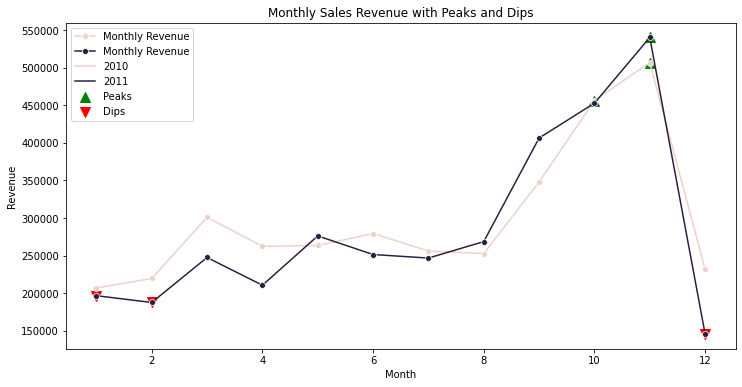

In [370]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=rev_frequency, x='Month', y='Revenue', marker='o', label="Monthly Revenue", hue='Year')
plt.scatter(peak_months['Month'], peak_months['Revenue'], color='green', label="Peaks", s=100, marker="^")
plt.scatter(dip_months['Month'], dip_months['Revenue'], color='red', label="Dips", s=100, marker="v")
plt.title("Monthly Sales Revenue with Peaks and Dips")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [371]:
peak_months_list = peak_months['YearMonth'].tolist() 
dip_months_list = dip_months['YearMonth'].tolist()

print("Peak months:", peak_months_list)
print("Dip months:", dip_months_list)

df_combined_with_segments['Season'] = df_combined_with_segments['YearMonth'].apply(
    lambda x: 'Peak' if x in peak_months_list else ('Dip' if x in dip_months_list else 'Normal')
)

Peak months: ['2011-11', '2010-11', '2010-10']
Dip months: ['2011-01', '2011-02', '2011-12']


In [372]:
pd.unique(df_combined_with_segments['Season'])

array(['Normal', 'Peak', 'Dip'], dtype=object)

In [373]:
seasonal_revenue = df_combined_with_segments.groupby(['Segment', 'Season'])['Revenue'].sum().unstack().fillna(0)
seasonal_revenue.reset_index(inplace= True)
seasonal_revenue

Season,Segment,Dip,Normal,Peak
0,High Value,224842.39,1977763.222,528721.242
1,Low Value,40866.30,478046.023,178212.510
2,Medium Value,168915.60,1688828.349,579606.630


In [374]:
print(df_combined_with_segments['Season'].value_counts())

Normal    356678
Peak      122634
Dip        38895
Name: Season, dtype: int64


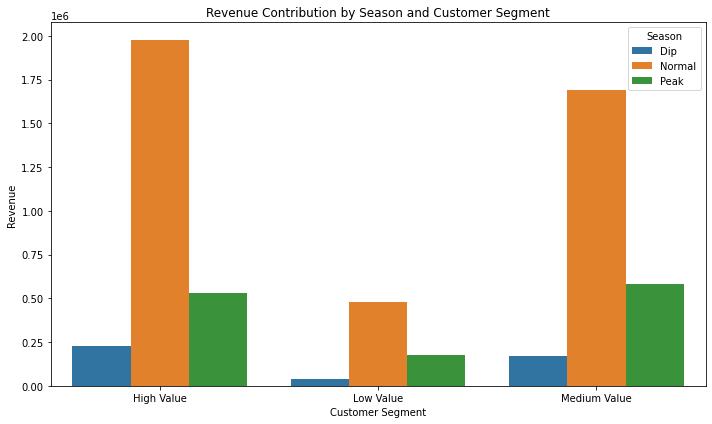

In [375]:
seasonal_revenue.reset_index(inplace=True)
df_melted = seasonal_revenue.melt(id_vars=['Segment'], value_vars=['Dip', 'Normal', 'Peak'],
                    var_name='Season', value_name='Revenue')

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Revenue', hue='Season', data=df_melted)
plt.title('Revenue Contribution by Season and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

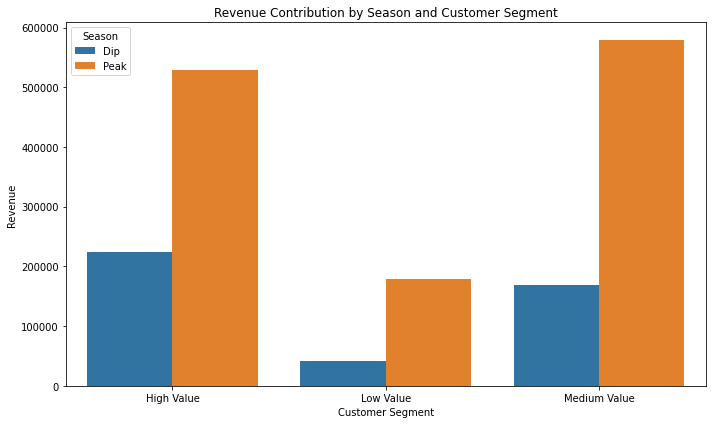

In [376]:
df_melted = seasonal_revenue.melt(id_vars=['Segment'], value_vars=['Dip', 'Peak'],
                    var_name='Season', value_name='Revenue')

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Revenue', hue='Season', data=df_melted)
plt.title('Revenue Contribution by Season and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

--- High Value Segment
- Dip Season: 224,842.39
- Normal Season: 1,977,763.22
- Peak Season: 528,721.24

- High-value customers contribute significantly during the normal season (about 87% of their total revenue) and still maintain a substantial contribution during peak months. Their behavior suggests strong loyalty and engagement across the year.

--- Low Value Segment
- Dip Season: 40,866.30
- Normal Season: 478,046.02
- Peak Season: 178,212.51
- The low-value segment generates minimal revenue year-round, with the majority coming from normal and peak seasons. These customers may need more encouragement to increase their transaction frequency.

--- Medium Value Segment
- Dip Season: 168,915.60
- Normal Season: 1,688,828.35
- Peak Season: 579,606.63
- Medium-value customers contribute significantly across all seasons, particularly in the normal season. Their contribution during peak months is also noteworthy, indicating that they are somewhat engaged but may not be as loyal or frequent as high-value customers.

Recommendation :

--- High Value Segment :
- Loyalty Programs: Continue nurturing this segment with exclusive offers, personalized rewards, and early access to new products. Since they engage well year-round, ensure their loyalty is maintained.
- Peak Season Boost: Focus on exclusive offers or bundles during the peak season to maximize revenue. These customers are likely to respond well to high-touch campaigns like VIP treatment or personalized product recommendations.

--- Low Value Segment :
- Re-engagement Campaigns: Since their revenue contribution during peak and normal seasons is limited, consider special campaigns to re-engage these customers. Offering time-sensitive discounts, loyalty points, or reminders for abandoned carts could help increase their frequency and total spend.
- Incentivize Transactions During Peak Months: Focus on boosting this segment during peak months through targeted promotions. Encourage them to increase their spend through bundle offers or limited-time deals.

--- Medium Value Segment :
- Seasonal Promotions: Target these customers during the dip season with promotions designed to drive repeat purchases. Since they are responsive during peak months, consider ramping up offers during off-peak times to smooth revenue and maintain consistent engagement.
- Segmented Marketing Campaigns: Consider running targeted email campaigns or personalized offers during the normal and peak seasons to further enhance their spending patterns. Try to move these customers into the high-value segment by increasing purchase frequency and spending.
